# Canada Post Sentiment Analysis

### Importing Libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from collections import Counter

# This will help view all the text
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the sample corpus
data = pd.read_csv('twitter_data.csv')
data

,date,id,content,username,like_count,retweet_count
0,2023-06-06 20:39:01+00:00,1666182930425585664,"@KirkLubimov That’s Weimar Canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.",DariusXCVI,0,0
1,2023-06-06 20:24:34+00:00,1666179294689624066,"@ottawabluesfest I paid 12$ Canada Post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨",Gayytie,0,0
2,2023-06-06 20:06:02+00:00,1666174630728544266,"Canada Post Stamp, 2011, Zodic Rabbit, Animal Stamp, Good Condition Collection, MNH FSLHMOU\n\nhttps://t.co/EvW5Rwhx2m https://t.co/OCool9sgS0",elda16a,0,0
3,2023-06-06 19:12:03+00:00,1666161043150630918,This arrived on time today!! \nThank you Canada Post!! https://t.co/dYePfuNm0D,ginya97,0,0
4,2023-06-06 19:00:06+00:00,1666158039391404040,@sp00ky20 @canadapostcorp Hi - please send us a DM with your mailing address so we can look into this.,canadaposthelps,1,0
...,...,...,...,...,...,...
4855,2023-02-16 18:34:17+00:00,1626288876955512832,@MahDryBread Canada Post lose any more of your mail? You might get it in the next century.\nhttps://t.co/cS0LNn2m5b,forbiddenspell2,1,0
4856,2023-02-16 18:06:34+00:00,1626281899319787522,Home sales in Canada post worst start to the year since 2009: CREA https://t.co/Imihj978xA,VernonNews,0,0
4857,2023-02-16 18:04:33+00:00,1626281393398636544,Home sales in Canada post worst start to the year since 2009: CREA https://t.co/OCH6zR3G8m,SurreyNowLeader,0,0
4858,2023-02-16 18:04:27+00:00,1626281368136331265,"@mishiikenhkwe Canada post is sooooo expensive now. if your customers want items, they will pay for shipping tho. It really shouldn’t be $40 or $50 to send a shoebox sized package… but that’s what it seems to be. In the city there’s other options, but rural and reserve, not so much….",Photochickee,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4860 non-null   object
 1   id             4860 non-null   int64 
 2   content        4860 non-null   object
 3   username       4860 non-null   object
 4   like_count     4860 non-null   int64 
 5   retweet_count  4860 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 227.9+ KB


In [4]:
data.describe()

,id,like_count,retweet_count
count,4.860000e+03,4860.000000,4860.000000
mean,1.647116e+18,5.283128,0.799383
std,1.165006e+16,58.626658,12.447522
min,1.626280e+18,0.000000,0.000000
25%,1.636450e+18,0.000000,0.000000
50%,1.648319e+18,0.000000,0.000000
75%,1.656637e+18,1.000000,0.000000
max,1.666183e+18,2985.000000,746.000000


In [5]:
data.nunique()

date             4773
id               4860
content          4743
username         3366
like_count        107
retweet_count      44
dtype: int64

In [6]:
cp_df = data

<b> Observation </b><p>
From the steps above it could be observed that there are 4860 tweets extracted for Canada Post.

### Handling user handles, links, and emoticons

In [7]:
# Defining regular expressions for user handles and links
user_handle_regex = r'@[\w_]+'
link_regex = r'https?://\S+'

# Defining a dictionary mapping emoticons to their respective feelings
emoticons_mapping = {
    ':)': 'happy',
    ':(': 'sad',
    ':D': 'laugh',
    ':P': 'playful',
    ';)': 'wink',
    ':|': 'neutral',
    ':O': 'surprised',
    ':*': 'kiss',
    ':/': 'confused',
    ':)': 'smile',
    ':\'(': 'cry',
    '$': 'pricing'
}

In [8]:
# Function to replace user handles with '@user'
def replace_user_handles(text):
    return re.sub(user_handle_regex, '@user', text)

# Function to replace links with 'http'
def replace_links(text):
    return re.sub(link_regex, 'http', text)

# Function to replace emoticons with their respective feeling
def replace_emoticons(text):
    for emoticon, feeling in emoticons_mapping.items():
        text = text.replace(emoticon, feeling)
    return text

In [9]:
# Apply the transformations to the 'tweet' column
cp_df['content'] = cp_df['content'].apply(replace_user_handles)
cp_df['content'] = cp_df['content'].apply(replace_links)
cp_df['content'] = cp_df['content'].apply(replace_emoticons)

In [10]:
cp_df.head()

,date,id,content,username,like_count,retweet_count
0,2023-06-06 20:39:01+00:00,1666182930425585664,"@user That’s Weimar Canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.",DariusXCVI,0,0
1,2023-06-06 20:24:34+00:00,1666179294689624066,"@user I paid 12pricing Canada Post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨",Gayytie,0,0
2,2023-06-06 20:06:02+00:00,1666174630728544266,"Canada Post Stamp, 2011, Zodic Rabbit, Animal Stamp, Good Condition Collection, MNH FSLHMOU\n\nhttp http",elda16a,0,0
3,2023-06-06 19:12:03+00:00,1666161043150630918,This arrived on time today!! \nThank you Canada Post!! http,ginya97,0,0
4,2023-06-06 19:00:06+00:00,1666158039391404040,@user @user Hi - please send us a DM with your mailing address so we can look into this.,canadaposthelps,1,0


In [11]:
cp_df.drop(['date','id','username','like_count','retweet_count'],axis=1,inplace=True)

In [12]:
cp_df.head()

,content
0,"@user That’s Weimar Canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken."
1,"@user I paid 12pricing Canada Post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨"
2,"Canada Post Stamp, 2011, Zodic Rabbit, Animal Stamp, Good Condition Collection, MNH FSLHMOU\n\nhttp http"
3,This arrived on time today!! \nThank you Canada Post!! http
4,@user @user Hi - please send us a DM with your mailing address so we can look into this.


### Lowercase tweets

In [13]:
cp_df['content'] = cp_df['content'].str.lower()

In [14]:
cp_df.head()

,content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken."
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http"
3,this arrived on time today!! \nthank you canada post!! http
4,@user @user hi - please send us a dm with your mailing address so we can look into this.


### Tokenize tweets

In [15]:
cp_df['tokenized_content'] = cp_df['content'].apply(word_tokenize)

In [16]:
cp_df.head()

,content,tokenized_content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[@, user, that, ’, s, weimar, canada, ,, post-national, ,, woke, ,, permissive, of, all, sorts, of, degeneracy, ,, spiritually, broken, .]"
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[@, user, i, paid, 12pricing, canada, post, ,, as, well, as, my, full, festival, pass, ,, only, for, my, tickets, to, not, arrive, and, no, assistance, 🫨]"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, ,, 2011, ,, zodic, rabbit, ,, animal, stamp, ,, good, condition, collection, ,, mnh, fslhmou, http, http]"
3,this arrived on time today!! \nthank you canada post!! http,"[this, arrived, on, time, today, !, !, thank, you, canada, post, !, !, http]"
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[@, user, @, user, hi, -, please, send, us, a, dm, with, your, mailing, address, so, we, can, look, into, this, .]"


### Removing Punctuations

In [17]:
import string

cp_df['tokenized_content'] = cp_df['tokenized_content'].apply(lambda tokens:
                                                              [token for token in tokens if token not in string.punctuation])

In [18]:
cp_df.head()

,content,tokenized_content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[user, that, ’, s, weimar, canada, post-national, woke, permissive, of, all, sorts, of, degeneracy, spiritually, broken]"
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[user, i, paid, 12pricing, canada, post, as, well, as, my, full, festival, pass, only, for, my, tickets, to, not, arrive, and, no, assistance, 🫨]"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodic, rabbit, animal, stamp, good, condition, collection, mnh, fslhmou, http, http]"
3,this arrived on time today!! \nthank you canada post!! http,"[this, arrived, on, time, today, thank, you, canada, post, http]"
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[user, user, hi, please, send, us, a, dm, with, your, mailing, address, so, we, can, look, into, this]"


### Removing Stopwords

In [19]:
from nltk.corpus import stopwords

In [20]:
stop_words = set(stopwords.words('english'))

cp_df['tokenized_content'] = cp_df['tokenized_content'].apply(lambda tokens:
                                                              [token for token in tokens if token.lower() not in stop_words])

In [21]:
cp_df.head()

,content,tokenized_content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[user, ’, weimar, canada, post-national, woke, permissive, sorts, degeneracy, spiritually, broken]"
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[user, paid, 12pricing, canada, post, well, full, festival, pass, tickets, arrive, assistance, 🫨]"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodic, rabbit, animal, stamp, good, condition, collection, mnh, fslhmou, http, http]"
3,this arrived on time today!! \nthank you canada post!! http,"[arrived, time, today, thank, canada, post, http]"
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[user, user, hi, please, send, us, dm, mailing, address, look]"


### Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
lemmatizer = WordNetLemmatizer()

cp_df['tokenized_content'] = cp_df['tokenized_content'].apply(lambda tokens:
                                                              [lemmatizer.lemmatize(token) for token in tokens])

In [24]:
cp_df.head()

,content,tokenized_content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[user, ’, weimar, canada, post-national, woke, permissive, sort, degeneracy, spiritually, broken]"
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[user, paid, 12pricing, canada, post, well, full, festival, pas, ticket, arrive, assistance, 🫨]"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodic, rabbit, animal, stamp, good, condition, collection, mnh, fslhmou, http, http]"
3,this arrived on time today!! \nthank you canada post!! http,"[arrived, time, today, thank, canada, post, http]"
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[user, user, hi, please, send, u, dm, mailing, address, look]"


### Handling acronyms and slang words

In [25]:
# Dictionary of acronym and slang mappings
acronym_mapping = {
    'omg': 'oh my god',
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'idk': 'i don\'t know',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'afk': 'away from keyboard',
    'imo': 'in my opinion',
    'jk': 'just kidding',
    'rofl': 'rolling on the floor laughing',
    'dm': 'direct message'
}

In [26]:
cp_df['tokenized_content'] = cp_df['tokenized_content'].apply(lambda tokens:
                                                              [acronym_mapping.get(token, token) for token in tokens])

In [27]:
cp_df.head()

,content,tokenized_content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[user, ’, weimar, canada, post-national, woke, permissive, sort, degeneracy, spiritually, broken]"
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[user, paid, 12pricing, canada, post, well, full, festival, pas, ticket, arrive, assistance, 🫨]"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodic, rabbit, animal, stamp, good, condition, collection, mnh, fslhmou, http, http]"
3,this arrived on time today!! \nthank you canada post!! http,"[arrived, time, today, thank, canada, post, http]"
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[user, user, hi, please, send, u, direct message, mailing, address, look]"


### Fixing typos

In [28]:
from autocorrect import Speller

In [29]:
spell = Speller(lang='en')

cp_df['tokenized_content'] = cp_df['tokenized_content'].apply(lambda tokens: [spell.autocorrect_word(word) for word in tokens])

In [30]:
cp_df.head()

,content,tokenized_content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[user, a, wear, canada, post-national, woke, permissive, sort, degenerate, spiritually, broken]"
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[user, paid, pricing, canada, post, well, full, festival, pas, ticket, arrive, assistance, a]"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodiac, rabbit, animal, stamp, good, condition, collection, mph, fslhmou, http, http]"
3,this arrived on time today!! \nthank you canada post!! http,"[arrived, time, today, thank, canada, post, http]"
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[user, user, hi, please, send, u, direct message, mailing, address, look]"


### Removing user and http words

In [31]:
cp_df['tokenized_content'] = cp_df['tokenized_content'].apply(lambda tokens:
                                                        [token for token in tokens if token.lower() not in ['user', 'http']])

In [32]:
cp_df.head()

,content,tokenized_content
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[a, wear, canada, post-national, woke, permissive, sort, degenerate, spiritually, broken]"
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[paid, pricing, canada, post, well, full, festival, pas, ticket, arrive, assistance, a]"
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodiac, rabbit, animal, stamp, good, condition, collection, mph, fslhmou]"
3,this arrived on time today!! \nthank you canada post!! http,"[arrived, time, today, thank, canada, post]"
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[hi, please, send, u, direct message, mailing, address, look]"


### Sentimental Analysis

In [33]:
from textblob import TextBlob

In [34]:
cp_df['sentiment'] = cp_df['tokenized_content'].apply(lambda tokens: TextBlob(' '.join(tokens)).sentiment.polarity)

In [35]:
cp_df.head()

,content,tokenized_content,sentiment
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[a, wear, canada, post-national, woke, permissive, sort, degenerate, spiritually, broken]",-0.40
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[paid, pricing, canada, post, well, full, festival, pas, ticket, arrive, assistance, a]",0.35
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodiac, rabbit, animal, stamp, good, condition, collection, mph, fslhmou]",0.70
3,this arrived on time today!! \nthank you canada post!! http,"[arrived, time, today, thank, canada, post]",0.00
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[hi, please, send, u, direct message, mailing, address, look]",0.10


In [36]:
cp_df.to_csv('Canadapost Sentiment.csv', sep=',', index=False, encoding='utf-8')

### Negative tweets

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

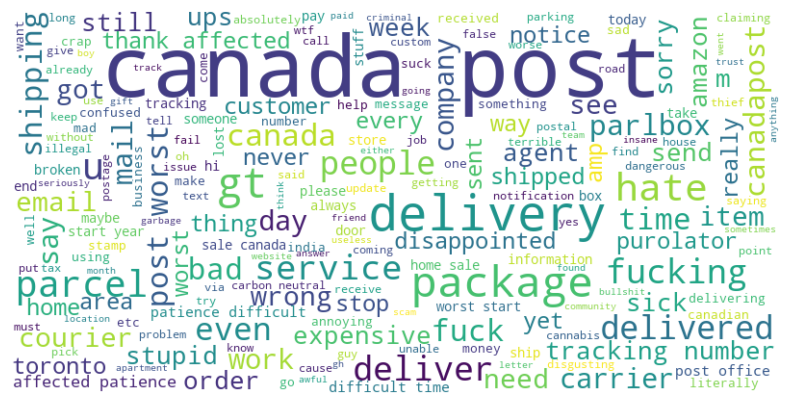

In [38]:
# Filter rows with sentiment scores close to -1
negative_df = cp_df[cp_df['sentiment'] <= -0.3]

# Concatenate all the words into a single string
words = ' '.join(sum(negative_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

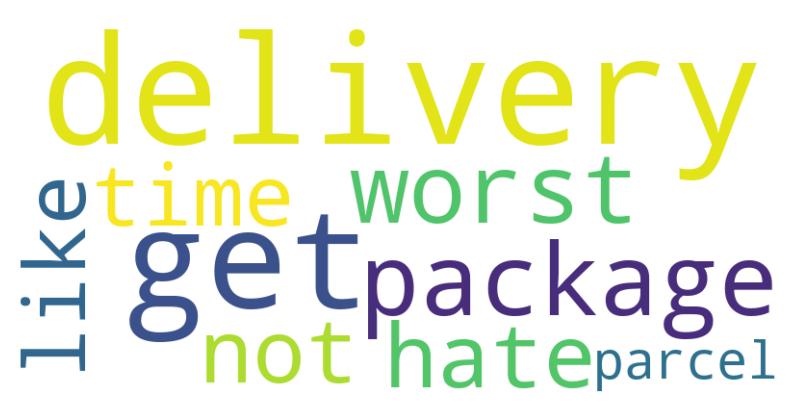

In [39]:
# Count the frequency of each word
word_counts = Counter(words.split())

# Get the top 5 words
top_words = word_counts.most_common(15)

# Exclude "canada" and "post" from top_words
filtered_top_words = [(word, count) for word, count in top_words if word not in ['canada', 'post', 'gt', 'a', 'is', 'u']]

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(filtered_top_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Neutral tweets

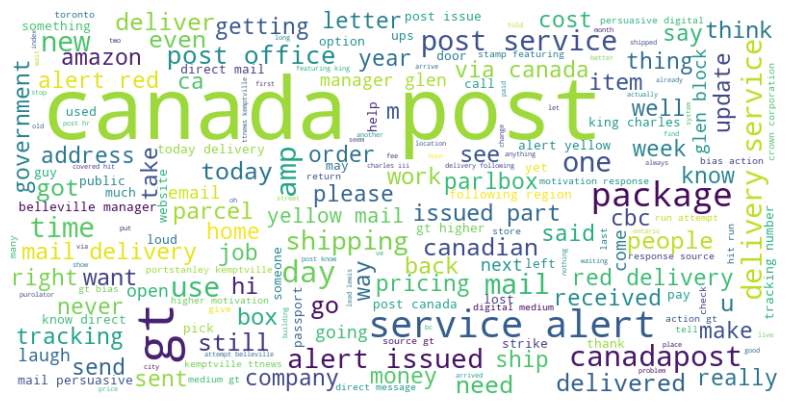

In [40]:
# Filter rows with sentiment scores close to -1
neutral_df = cp_df[(cp_df['sentiment'] > -0.3) & (cp_df['sentiment'] < 0.3)]

# Concatenate all the words into a single string
words = ' '.join(sum(neutral_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive tweets

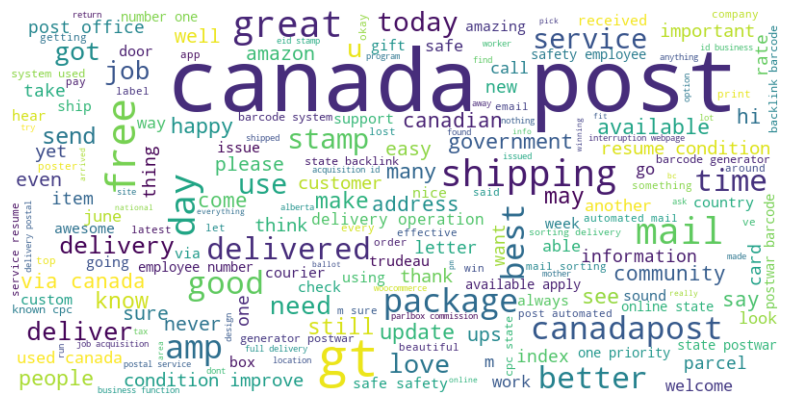

In [41]:
# Filter rows with sentiment scores close to -1

# Concatenate all the words into a single string
words = ' '.join(sum(positive_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# Define conditions and corresponding values
conditions = [
    cp_df['sentiment']  >= 0.3,
    (cp_df['sentiment'] > -0.3) & (cp_df['sentiment'] < 0.3),
    cp_df['sentiment'] <= -0.3
]

values = ['Postive', 'Neutral', 'Negative']

In [43]:
cp_df['sentiment_type'] = np.select(conditions, values, default='Unknown')

In [44]:
cp_df.head()

,content,tokenized_content,sentiment,sentiment_type
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[a, wear, canada, post-national, woke, permissive, sort, degenerate, spiritually, broken]",-0.40,Negative
1,"@user i paid 12pricing canada post, as well as my full festival pass, only for my tickets to not arrive and no assistance 🫨","[paid, pricing, canada, post, well, full, festival, pas, ticket, arrive, assistance, a]",0.35,Postive
2,"canada post stamp, 2011, zodic rabbit, animal stamp, good condition collection, mnh fslhmou\n\nhttp http","[canada, post, stamp, 2011, zodiac, rabbit, animal, stamp, good, condition, collection, mph, fslhmou]",0.70,Postive
3,this arrived on time today!! \nthank you canada post!! http,"[arrived, time, today, thank, canada, post]",0.00,Neutral
4,@user @user hi - please send us a dm with your mailing address so we can look into this.,"[hi, please, send, u, direct message, mailing, address, look]",0.10,Neutral


In [45]:
cp_df.to_csv('Canada Post Sentiment.csv', sep=',', index=False, encoding='utf-8')

In [46]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])


In [47]:
#Count_values for sentiment
count_values_in_column(cp_df,'sentiment_type')

,Total,Percentage
Neutral,3860,79.42
Postive,631,12.98
Negative,369,7.59


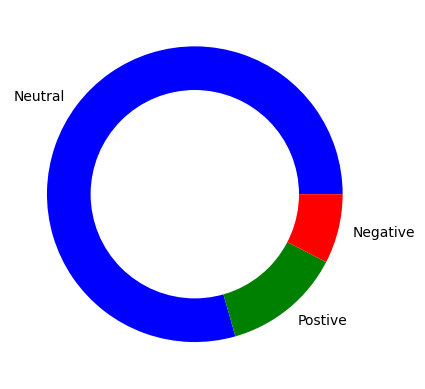

In [48]:
# create data for Pie Chart
piechart = count_values_in_column(cp_df,'sentiment_type')
names= piechart.index
size=piechart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [49]:
# Filter data for negative sentiment_type
negative_data = cp_df[cp_df['sentiment_type'] == 'Negative']

negative_data

,content,tokenized_content,sentiment,sentiment_type
0,"@user that’s weimar canada, post-national, woke, permissive of all sorts of degeneracy, spiritually broken.","[a, wear, canada, post-national, woke, permissive, sort, degenerate, spiritually, broken]",-0.400000,Negative
25,we thank those affected for their patience in this difficult time.\n\n(5/5),"[thank, affected, patience, difficult, time, 5/5]",-0.500000,Negative
63,@user @user issue means it's been printed. all canada passport has to do give it to canada post.,"[issue, mean, is, printed, canada, passport, give, canada, post]",-0.312500,Negative
66,"@user hi there - we're disappointed to read this. if you would like to lodge a formal complaint regarding any of our delivery agents, please get in touch with our customer service team at 1-866-607-6301.","[hi, are, disappointed, read, would, like, lodge, formal, complaint, regarding, delivery, agent, please, get, touch, customer, service, team, 1-866-607-6301]",-0.525000,Negative
83,"@user hi there, we take these issues very seriously and urge you to formally report this to our support team at 1-866-607-6301.","[hi, take, issue, seriously, urge, formally, report, support, team, 1-866-607-6301]",-0.333333,Negative
...,...,...,...,...
4830,home sales in canada post worst start to the year since 2009: crea http,"[home, sale, canada, post, worst, start, year, since, 2009, area]",-1.000000,Negative
4837,home sales in canada post worst start to the year since 2009: crea http via @user #realestate,"[home, sale, canada, post, worst, start, year, since, 2009, area, via, realestate]",-1.000000,Negative
4848,"`missed delivery - will attempt delivery on next working day`...\n\nthis is impossible. we live in a small house, been home all day. this crap puts independent online retailers at such a disadvantage vs. goliath like amazon.\n\nshame on canada post for awful, anti-smb service.","[missed, delivery, attempt, delivery, next, working, day, ..., impossible, live, small, house, home, day, crap, put, independent, online, retailer, disadvantage, vs, goliath, like, amazon, shame, canada, post, awful, anti-smb, service]",-0.368615,Negative
4856,home sales in canada post worst start to the year since 2009: crea http,"[home, sale, canada, post, worst, start, year, since, 2009, area]",-1.000000,Negative


In [50]:
negative_data.to_csv('Canada Post Negative Tweets.csv', sep=',', index=False, encoding='utf-8')